<a href="https://colab.research.google.com/github/preethishas2022/Qiskit_exercise-8/blob/main/Two_Qubit_Circuits_and_Tensor_Products.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit qiskit-aer pylatexenc matplotlib -q


In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from IPython.display import Image, display
import io

simulator = AerSimulator()


In [ ]:
def show_histogram(counts, title):
    """Plot histogram safely with visible bars and labels."""
    fig, ax = plt.subplots(figsize=(5,4))
    plot_histogram(counts, ax=ax, bar_labels=True)
    ax.set_title(title, fontsize=11)
    ax.set_xlabel("Measurement Outcomes")
    ax.set_ylabel("Counts")
    ax.grid(True, axis='y', linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

# **1. Change Gate Combination**

🔹 Task 1: Hadamard on Both Qubits


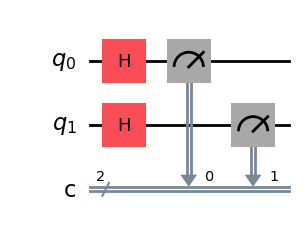


Measurement Counts: {'01': 245, '11': 260, '00': 259, '10': 260}


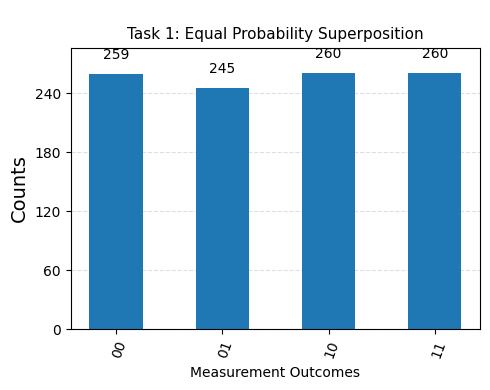


Observation: Each qubit is in superposition → Equal probabilities for 00, 01, 10, 11.


In [ ]:
qc1 = QuantumCircuit(2, 2)
qc1.h(0)
qc1.h(1)
qc1.measure([0,1],[0,1])

compiled = transpile(qc1, simulator)
result = simulator.run(compiled, shots=1024).result()
counts1 = result.get_counts()

print("🔹 Task 1: Hadamard on Both Qubits")
display(qc1.draw('mpl'))
print("\nMeasurement Counts:", counts1)
show_histogram(counts1, "\nTask 1: Equal Probability Superposition")
print("\nObservation: Each qubit is in superposition → Equal probabilities for 00, 01, 10, 11.")
# Observation: All four states (00,01,10,11) have nearly equal probability.

# **2. Swap Qubit Roles**

🔹 Task 2: Swap Qubit Roles (X gate on 2nd qubit)


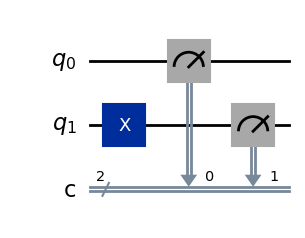

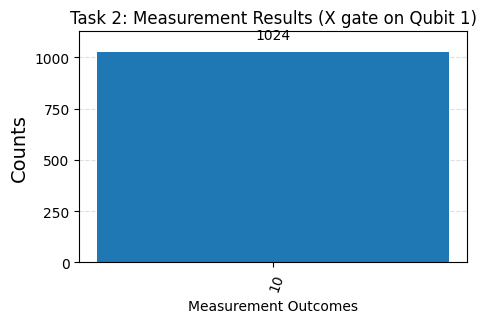

Measurement Counts: {'10': 1024}

Observation: Second qubit flipped → Only |01⟩ outcome appears.


In [ ]:
qc2 = QuantumCircuit(2, 2)

qc2.x(1)
qc2.measure([0, 1], [0, 1])

compiled = transpile(qc2, simulator)
result = simulator.run(compiled, shots=1024).result()
counts2 = result.get_counts()

print("🔹 Task 2: Swap Qubit Roles (X gate on 2nd qubit)")
display(qc2.draw('mpl'))
plt.show()

fig, ax = plt.subplots(figsize=(5,3))
plot_histogram(counts2, ax=ax, bar_labels=True)
plt.title("Task 2: Measurement Results (X gate on Qubit 1)")
plt.xlabel("Measurement Outcomes")
plt.ylabel("Counts")
plt.grid(True, axis='y', linestyle='--', alpha=0.4)
plt.show()
print("Measurement Counts:", counts2)
print("\nObservation: Second qubit flipped → Only |01⟩ outcome appears.")

# **3. Add a CNOT Gate**


🔹 Task 3: Hadamard + CNOT (Entangled State)


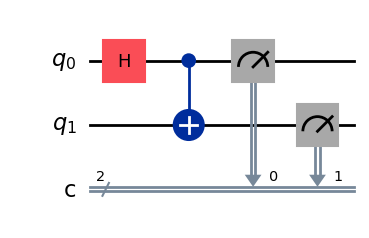

Measurement Counts: {'11': 521, '00': 503}


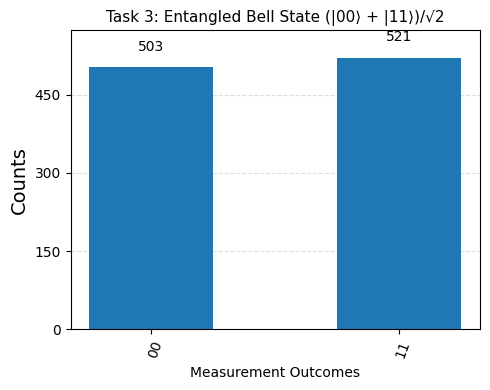


Observation: Bell State formed → Only |00⟩ and |11⟩ appear (entangled).


In [ ]:
qc3 = QuantumCircuit(2, 2)
qc3.h(0)
qc3.cx(0,1)
qc3.measure([0,1],[0,1])

compiled = transpile(qc3, simulator)
result = simulator.run(compiled, shots=1024).result()
counts3 = result.get_counts()

print("\n🔹 Task 3: Hadamard + CNOT (Entangled State)")
display(qc3.draw('mpl'))
print("Measurement Counts:", counts3)
show_histogram(counts3, "Task 3: Entangled Bell State (|00⟩ + |11⟩)/√2")
# Observation: Only 00 and 11 outcomes show → Bell state entanglement.
print("\nObservation: Bell State formed → Only |00⟩ and |11⟩ appear (entangled).")

# **4. Increase Measurement Shots**


🔹 Task 4: 4096 Shots (Stable Distribution)


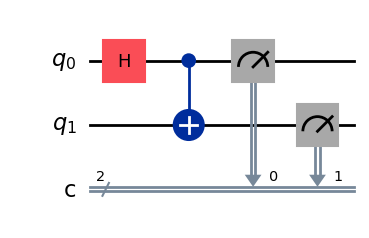

Measurement Counts: {'00': 2028, '11': 2068}


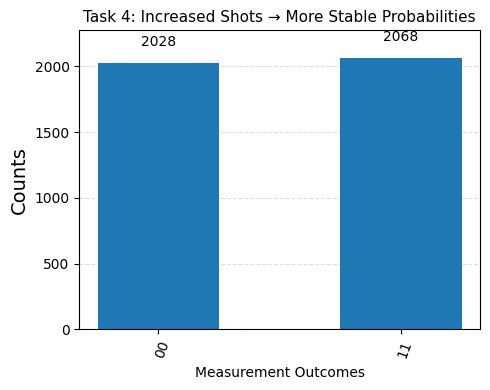


Observation: Higher shots give smoother, more stable 50/50 distribution.


In [ ]:
qc4 = QuantumCircuit(2, 2)
qc4.h(0)
qc4.cx(0,1)
qc4.measure([0,1],[0,1])

compiled = transpile(qc4, simulator)
result = simulator.run(compiled, shots=4096).result()
counts4 = result.get_counts()

print("\n🔹 Task 4: 4096 Shots (Stable Distribution)")
display(qc4.draw('mpl'))
print("Measurement Counts:", counts4)
show_histogram(counts4, "Task 4: Increased Shots → More Stable Probabilities")
print("\nObservation: Higher shots give smoother, more stable 50/50 distribution.")
# Observation: Larger shot count → histogram becomes smoother and more stable.

# **5. Add a New Visualization**

Quantum Circuit Diagram:


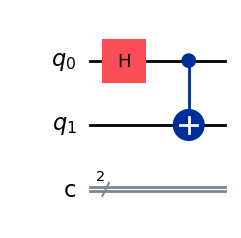

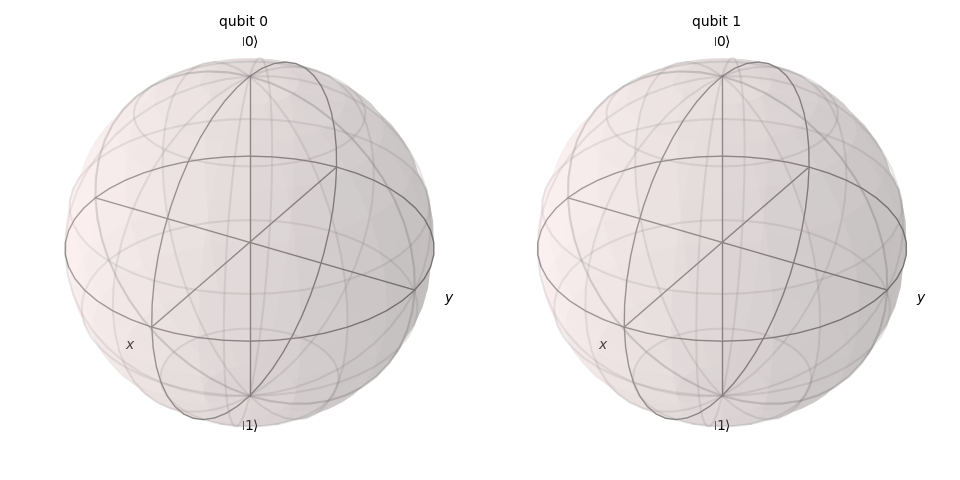

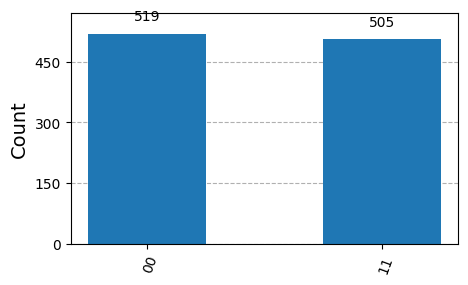


Observation:
Before measurement: The Bloch spheres show entanglement — correlated quantum states.
After measurement: The superposition collapses — histogram shows only classical outcomes.


In [ ]:
qc5 = QuantumCircuit(2, 2)
qc5.h(0)
qc5.cx(0, 1)

print("Quantum Circuit Diagram:")
display(qc5.draw('mpl'))
plt.show()

state_before = Statevector.from_instruction(qc5)
fig_before = plot_bloch_multivector(state_before)
buf = io.BytesIO()
fig_before.savefig(buf, format='png')
buf.seek(0)
display(Image(data=buf.getvalue()))
plt.close(fig_before)

qc5.measure([0, 1], [0, 1])
compiled = transpile(qc5, sim)
result = sim.run(compiled, shots=1024).result()
counts_after = result.get_counts()
fig, ax = plt.subplots(figsize=(5,3))
plot_histogram(counts_after, ax=ax)
plt.show()

print("\nObservation:")
print("Before measurement: The Bloch spheres show entanglement — correlated quantum states.")
print("After measurement: The superposition collapses — histogram shows only classical outcomes.")